In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
media_data=pd.read_csv("mediacompany.csv")
media_data=media_data.drop("Unnamed: 7",axis=1)

In [5]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [15]:
media_data["Date"]=pd.to_datetime(media_data["Date"])

In [16]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [61]:
from datetime import date
d0=date(2017,2,28)
d1=media_data.Date
delta=d1-pd.Timestamp(d0)
media_data["day"]=delta

In [62]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days,5 days


In [63]:
media_data["day"]=media_data['day'].astype(str)
media_data["day"]=media_data['day'].map(lambda x:x[0:2])
media_data["day"]=media_data['day'].astype(int)


<AxesSubplot:xlabel='day'>

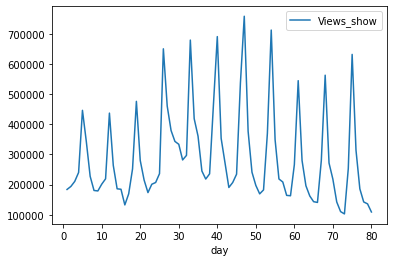

In [64]:
media_data.plot(x="day",y="Views_show")

In [78]:
media_data["weekday"]=(media_data["day"]+3)%7
media_data.weekday.replace(0,7,inplace=True)
media_data["weekday"]=media_data["weekday"].astype(int)
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days,5,1


In [79]:
#week days and visitors
x=media_data[["Visitors",'weekday']]
y=media_data["Views_show"]

In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
lm=LinearRegression()

In [85]:
lm.fit(x,y)

LinearRegression()

In [86]:
import statsmodels.api as sm

In [87]:
x=sm.add_constant(x)

In [89]:
lm_1=sm.OLS(y,x).fit()

In [90]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           8.01e-12
Time:                        23:10:06   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [91]:
#create weekend varible with value 1 and other 0
def cond(i):
    if i%7==5: return 1
    elif i%7==4: return 1
    else: return 0
    return i
media_data["weekend"]=[cond(i) for i in media_data["day"]]

In [93]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days,5,1,1


In [94]:
x=media_data[["Visitors",'weekend']]
y=media_data["Views_show"]

In [97]:
x=sm.add_constant(x)
lm_2=sm.OLS(y,x).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           2.51e-12
Time:                        23:17:08   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [98]:
x=media_data[["Visitors",'weekend',"Character_A"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_3=sm.OLS(y,x).fit()
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.53e-14
Time:                        23:18:19   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [102]:
media_data["lag_views"]=np.roll(media_data["Views_show"],1)
media_data.lag_views.replace(108961,0,inplace=True)

In [104]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,day,weekday,weekend,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days,5,1,1,240061


In [105]:
x=media_data[["Visitors",'weekend',"Character_A","lag_views"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_4=sm.OLS(y,x).fit()
print(lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           3.16e-21
Time:                        23:27:42   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<AxesSubplot:>

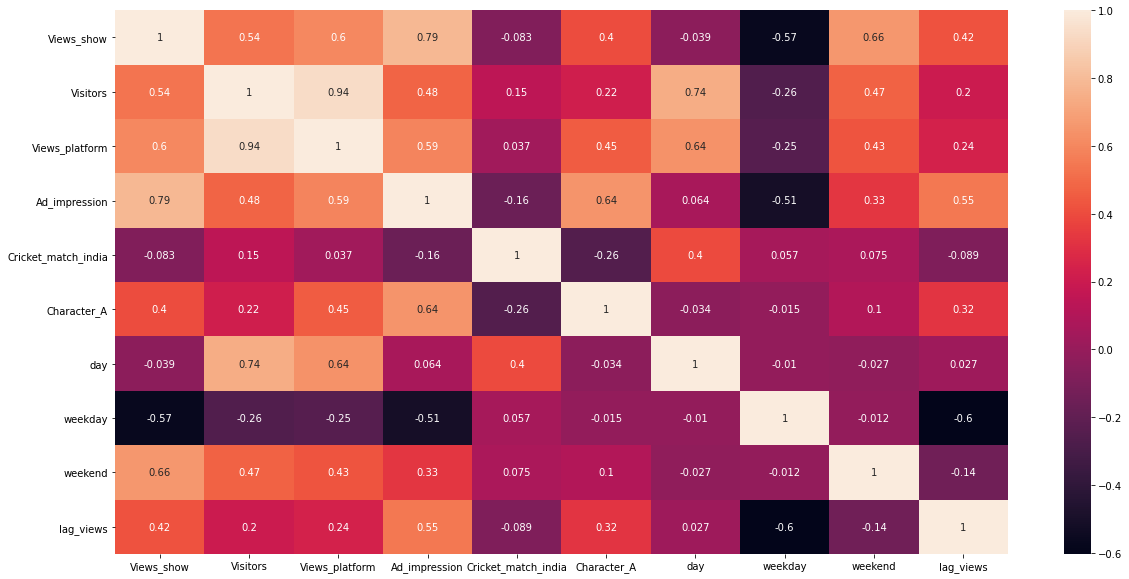

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(media_data.corr(),annot=True)

In [112]:
x=media_data[["Views_platform",'weekend',"Character_A"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_5=sm.OLS(y,x).fit()
print(lm_5.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           3.59e-15
Time:                        23:32:57   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [114]:
x=media_data[["Visitors",'weekend',"Character_A"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_6=sm.OLS(y,x).fit()
print(lm_6.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.53e-14
Time:                        23:34:41   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [116]:
x=media_data[["Visitors",'weekend',"Character_A","Ad_impression"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_7=sm.OLS(y,x).fit()
print(lm_7.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.10e-25
Time:                        23:37:14   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [117]:
x=media_data[["Ad_impression",'weekend',"Character_A"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_8=sm.OLS(y,x).fit()
print(lm_8.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.05e-26
Time:                        23:38:26   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [128]:
#add impression im million
media_data["ad_impression_million"]=media_data["Ad_impression"]/1000000

In [129]:
x=media_data[["ad_impression_million","Cricket_match_india",'weekend',"Character_A"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_9=sm.OLS(y,x).fit()
print(lm_9.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.02e-25
Time:                        23:41:51   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [137]:
x=media_data[["ad_impression_million",'weekend',"Character_A"]]
y=media_data["Views_show"]
x=sm.add_constant(x)
lm_10=sm.OLS(y,x).fit()
Predicted_views=lm_10.predict(x)


In [135]:
from sklearn.metrics import mean_squared_error,r2_score


In [138]:
mse=mean_squared_error(media_data.Views_show,Predicted_views)
r_squared=r2_score(media_data.Views_show,Predicted_views)

In [139]:
print("Mean_squared Value:",mse)
print("r_square_value",r_squared)

Mean_squared Value: 4677651616.253406
r_square_value 0.8026434468575651


Text(0, 0.5, 'Views')

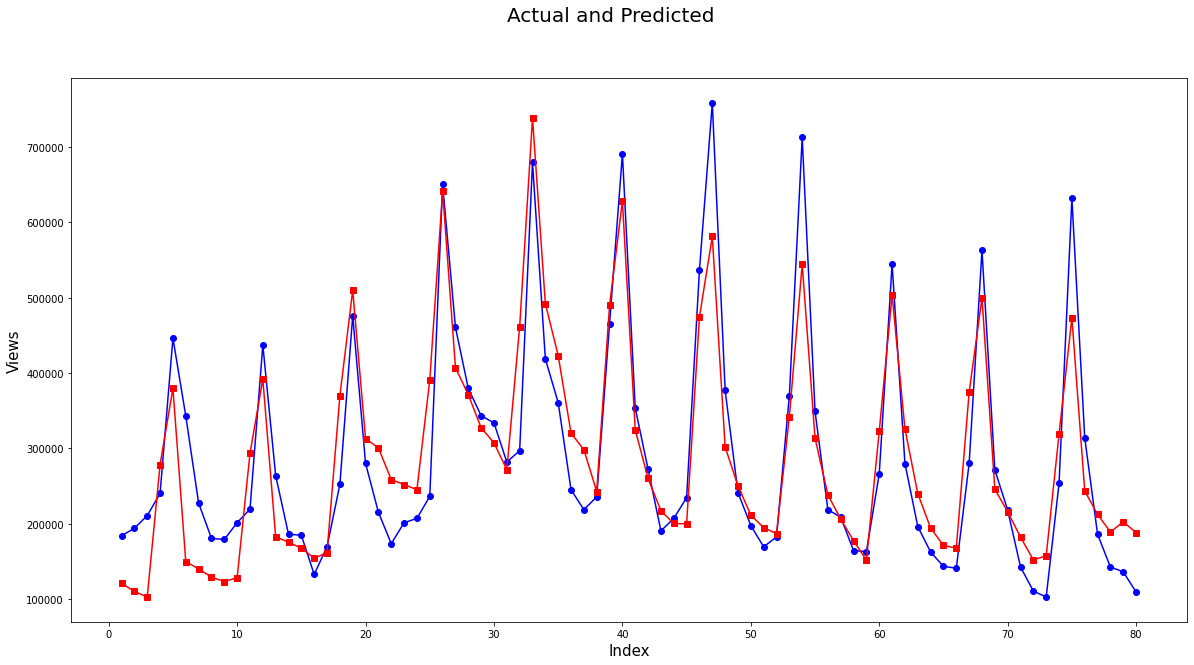

In [149]:
c=[ i for i in range(1,81,1)]
fig=plt.figure(figsize=(20,10))
plt.plot(c,media_data.Views_show,color="Blue",linestyle="-",marker="o")
plt.plot(c,Predicted_views,color="red",linestyle="-",marker="s")
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Index",fontsize=15)
plt.ylabel("Views",fontsize=15)


Text(0, 0.5, 'Views_shows-Predicted_views')

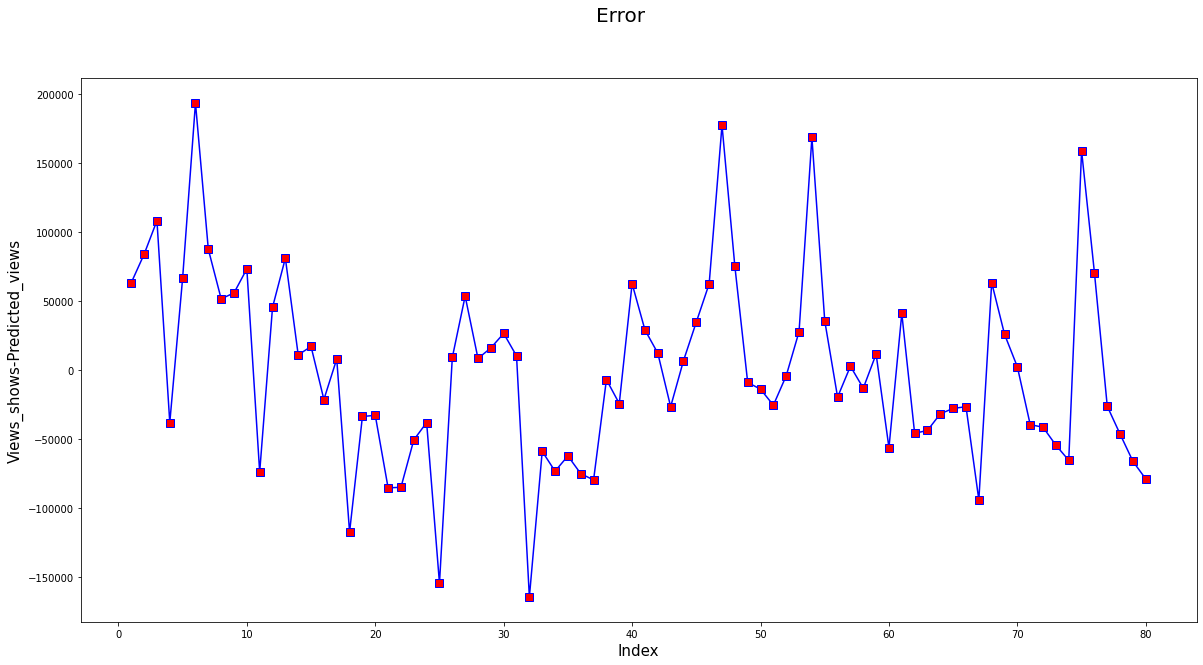

In [167]:
c=[ i for i in range(1,81,1)]
fig=plt.figure(figsize=(20,10))
plt.plot(c,media_data.Views_show-Predicted_views,color="blue",linestyle="-",marker="s",markersize=8,mfc="red")
fig.suptitle("Error",fontsize=20)
plt.xlabel("Index",fontsize=15)
plt.ylabel("Views_shows-Predicted_views",fontsize=15)
